# ARCNET

## Methods

#### 1. State Space Definition
Let $\mathcal{S}$ be the system state space where each module $m_i^{(t)}$ at time $t$ is defined as:

$$m_i^{(t)} = \{\mathbf{W}_i, \mathbf{b}_i, \mathbf{p}_i^{(t)}, Q_i^{(t)}, f_i^{(t)}, A_i^{(t)}\}$$

Where:

- $\mathbf{W}_i, \mathbf{b}_i$: Neural network parameters  
- $\mathbf{p}_i^{(t)} \in [0,1]^d$: Position on learned manifold $\mathcal{M}$  
- $Q_i^{(t)}$: Q-learning function (neural or tabular)  
- $f_i^{(t)} \in [0,1]$: Fitness score  
- $A_i^{(t)}$: Assembly properties  

#### 2. Core Mathematical Operations

**2.1 Manifold Learning Component**

The system learns a manifold embedding: 

$$
\mathbf{z}_i = \text{Encoder}(\bar{\mathbf{x}}) \rightarrow \mathbf{p}_i^{(0)} = \sigma(\mathbf{z}_i)
$$

Where:  
- $\mathbf{z}_i$: Latent vector for module $i$  
- $\text{Encoder}(\cdot)$: Neural encoder function  
- $\bar{\mathbf{x}}$: Input data  
- $\sigma(\cdot)$: Activation function (e.g., sigmoid)  
- $\mathbf{p}_i^{(0)}$: Initial position on manifold for module $i$  

Geodesic distance on learned manifold: 

$$
d_{\mathcal{M}}(\mathbf{p}_i, \mathbf{p}_j) = 
\begin{cases} 
|\mathbf{p}_i - \mathbf{p}_j|_2 & \text{if } \mathbf{T}_i = \emptyset \\
|\mathbf{T}_i^T(\mathbf{p}_j - \mathbf{p}_i)|_2 \cdot (1 + 0.1|\kappa_i||\mathbf{T}_i^T(\mathbf{p}_j - \mathbf{p}_i)|_2) & \text{otherwise} 
\end{cases}
$$

Where:  
- $d_{\mathcal{M}}(\mathbf{p}_i, \mathbf{p}_j)$: Geodesic distance between modules $i$ and $j$  
- $\mathbf{p}_i, \mathbf{p}_j$: Positions on manifold  
- $\mathbf{T}_i$: Tangent space at $\mathbf{p}_i$  
- $\kappa_i$: Curvature at $\mathbf{p}_i$  
- $|\cdot|_2$: Euclidean norm  

**2.2 Q-Learning Evolution Dynamics**

Each module maintains a Q-function $Q_i: \mathcal{S} \times \mathcal{A} \rightarrow \mathbb{R}$ updated via: 

$$
Q_i(s,a) \leftarrow Q_i(s,a) + \alpha[R(m_{\text{child}}) + \gamma \max_{a'} Q_i(s',a') - Q_i(s,a)]
$$

Where:  
- $Q_i(s,a)$: Q-value for state $s$ and action $a$ for module $i$  
- $\alpha$: Learning rate  
- $R(m_{\text{child}})$: Reward for child module  
- $\gamma$: Discount factor  
- $s'$: Next state  
- $a'$: Next action  
- $\max_{a'} Q_i(s',a')$: Maximum Q-value for next state  

Proof of Q-Learning Convergence: Under standard assumptions (bounded rewards, sufficient exploration), this satisfies the Robbins-Monro conditions, guaranteeing convergence to $Q^*$.

**2.3 Multi-Objective Fitness Function**

The adaptive fitness function implements a time-varying optimization:

$$
F_i^{(t)} = w_1^{(t)} \cdot \text{Accuracy}_i + w_2^{(t)} \cdot \text{Diversity}_i + w_3^{(t)} \cdot \text{Entropy}_i - \text{Penalty}_i^{(t)}
$$

Where:  
- $F_i^{(t)}$: Fitness of module $i$ at time $t$  
- $w_1^{(t)}, w_2^{(t)}, w_3^{(t)}$: Time-varying weights  
- $\text{Accuracy}_i$: Accuracy metric for module $i$  
- $\text{Diversity}_i$: Diversity metric  
- $\text{Entropy}_i$: Entropy metric  
- $\text{Penalty}_i^{(t)}$: Penalty term at time $t$  

Weights evolve as: 

$$
w^{(t)} = 
\begin{cases} 
(1.5w_n, 1.2w_e, 0.8w_a) & \text{if } t < 0.3T \\
(w_n, w_e, w_a) & \text{if } 0.3T \leq t < 0.7T \\
(0.7w_n, 0.8w_e, 1.3w_a) & \text{if } t \geq 0.7T 
\end{cases}
$$

Where:  
- $w_n, w_e, w_a$: Base weights for accuracy, diversity, and entropy  
- $T$: Total time steps  
- $t$: Current time step  

#### 3. Autocatalytic Assembly Dynamics

The assembly complexity grows according to: 

$$
A_{\text{sys}}^{(t)} = \frac{1}{|\mathcal{P}|} \sum_{i=1}^{|\mathcal{P}|} e^{a_i} \cdot \frac{n_i - 1}{|\mathcal{P}|}
$$

Where:  
- $A_{\text{sys}}^{(t)}$: System assembly complexity at time $t$  
- $|\mathcal{P}|$: Population size  
- $a_i$: Assembly complexity of module $i$  
- $n_i$: Copy number of module type $i$  

Assembly Theorem: Under controlled catalysis, the system complexity $A_{\text{sys}}^{(t)}$ is bounded by: 

$$
A_{\text{sys}}^{(t)} \leq C \cdot \log(t) + A_0
$$

Where:  
- $C$: Constant  
- $A_0$: Initial complexity  
- $t$: Time step  

Proof Sketch: The exponential assembly growth is constrained by the bias elimination mechanism and survivor selection, creating a logarithmic upper bound.

#### 4. Bias Elimination Mechanism

The system implements an adaptive bias detection function: 

$$
\text{Bias}(m_i, t) = \max_k P(y_i = k | \mathbf{x}) - \text{threshold}(t)
$$

Where:  
- $\text{Bias}(m_i, t)$: Bias for module $i$ at time $t$  
- $P(y_i = k | \mathbf{x})$: Probability of class $k$ given input $\mathbf{x}$  
- $\text{threshold}(t)$: Adaptive threshold at time $t$  

Where $\text{threshold}(t) = 0.75 + 0.2 \cdot \frac{t}{T}$ creates an adaptive tolerance.

- $T$: Total time steps  
- $t$: Current time step  

Anti-Convergence Theorem: The bias elimination ensures population diversity: 

$$
\lim_{t \rightarrow \infty} \mathbb{E}[\text{Entropy}(\mathcal{P}^{(t)})] \geq H_{\min} > 0
$$

Where:  
- $\mathbb{E}[\text{Entropy}(\mathcal{P}^{(t)})]$: Expected entropy of population at time $t$  
- $H_{\min}$: Minimum entropy bound  

#### 5. Message Passing and Information Flow

For each module $m_i$, select neighbors by manifold distance: 

$$
\mathcal{N}_{\mathcal{M}}(m_i) = \{m_j : d_{\mathcal{M}}(\mathbf{p}_i, \mathbf{p}_j) \text{ among } k \text{ smallest}\}
$$

Where:  
- $\mathcal{N}_{\mathcal{M}}(m_i)$: Set of $k$ nearest neighbors to $m_i$ on the manifold  
- $d_{\mathcal{M}}(\mathbf{p}_i, \mathbf{p}_j)$: Manifold distance between $i$ and $j$  
- $k$: Number of neighbors  

Information propagates via manifold-aware messaging: 

$$
\mathbf{M}_i^{(t)} = \sigma(g_i) \cdot \frac{1}{|\mathcal{N}_{\mathcal{M}}(m_i)|} \sum_{j \in \mathcal{N}_{\mathcal{M}}(m_i)} \frac{\mathbf{h}_j^{(t-1)}}{1 + d_{\mathcal{M}}(\mathbf{p}_i, \mathbf{p}_j)}
$$

Where:  
- $\mathbf{M}_i^{(t)}$: Message received by module $i$ at time $t$  
- $\sigma(g_i)$: Activation function applied to gating variable $g_i$  
- $|\mathcal{N}_{\mathcal{M}}(m_i)|$: Number of neighbors  
- $\mathbf{h}_j^{(t-1)}$: Hidden state of neighbor $j$ at previous time  
- $d_{\mathcal{M}}(\mathbf{p}_i, \mathbf{p}_j)$: Manifold distance  

Information Flow Theorem: Under connected manifold topology, information propagates globally in $O(\log n)$ steps.

#### 6. Main Convergence Proof

Theorem (AAN-Q Global Convergence): Under the following conditions:

- Bounded fitness landscape: $F: \mathcal{S} \rightarrow [0,1]$
- Sufficient exploration: $\epsilon$-greedy Q-learning with $\epsilon > 0$
- Controlled bias elimination: $|\text{eliminated}| \leq \alpha |\mathcal{P}|$ per step
- Manifold Lipschitz continuity: $|F(\mathbf{p}_1) - F(\mathbf{p}_2)| \leq L \cdot d_{\mathcal{M}}(\mathbf{p}_1, \mathbf{p}_2)$

The system converges to a stable configuration: 

$$
\lim_{t \rightarrow \infty} \mathbb{E}[F_{\text{best}}^{(t)}] = F^* - \delta
$$

Where:  
- $\mathbb{E}[F_{\text{best}}^{(t)}]$: Expected best fitness at time $t$  
- $F^*$: Optimal fitness  
- $\delta$: Exploration-exploitation gap  

Proof Strategy:

- Q-Learning Convergence: Standard MDP theory guarantees $Q_i \rightarrow Q_i^*$
- Manifold Regularization: The geodesic distance creates smooth fitness landscapes
- Population Dynamics: Bias elimination prevents premature convergence
- Assembly Constraints: Bounded complexity prevents runaway growth

#### 7. Computational Complexity

The algorithm has complexity:

Per Step: $O(n^2 d + n \cdot |Q|)$ where $n = |\mathcal{P}|$, $d$ = manifold dimension

Overall: $O(T \cdot n^2 d)$ for $T$ evolution steps

Where:  
- $n$: Population size  
- $d$: Manifold dimension  
- $|Q|$: Size of Q-table or Q-function  
- $T$: Number of evolution steps  

#### 8. System Complexity

**8.1 Assembly Theory Metric**

$$
A_{\text{sys}}^{(t)} = \frac{1}{|\mathcal{P}|} \sum_{i=1}^{|\mathcal{P}|} e^{a_i} \cdot \frac{n_i - 1}{|\mathcal{P}|}
$$

Where:  
- $A_{\text{sys}}^{(t)}$: System assembly complexity at time $t$  
- $|\mathcal{P}|$: Population size  
- $a_i$: Assembly complexity of module $i$  
- $n_i$: Copy number of module type $i$  

Each neural module (`ConceptModule`) tracks the minimal assembly complexity of it's weights. 
- Each layer's weights are wrapped in `ARCENET.core.ModuleComponent` that records the pathway
- When a module is mutated, new components are created with parent references, enabling reuse tracking
- The per-layer and total assemble complexity can be queried for any module with `ARCENET.models.arcnet_learner.system_assembly_complexity`
- System-level complexity is computed as the formula above, using the sum of exponentiated assembly indicies

#### 9. Complete System Evolution

The system evolves according to: 

$$
\mathcal{P}^{(t+1)} = \text{Select}(\mathcal{P}^{(t)}) \cup \text{Mutate}(\text{Select}(\mathcal{P}^{(t)}), Q^{(t)})
$$

Where:  
- $\mathcal{P}^{(t)}$: Population at time $t$  
- $\text{Select}(\cdot)$: Selection operator  
- $\text{Mutate}(\cdot, Q^{(t)})$: Mutation operator using Q-function $Q^{(t)}$  

With the objective of maximizing: 

$$
\mathcal{L} = \mathbb{E}_{t,i}\left[ R(m_i^{(t)}) \right] - \lambda A_{\text{sys}}^{(t)}
$$

Where:  
- $\mathcal{L}$: Objective function  
- $R(m_i^{(t)})$: Reward for module $i$ at time $t$  
- $\lambda$: Regularization parameter  
- $A_{\text{sys}}^{(t)}$: System assembly complexity at time $t$  

***
***

In [3]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='torchvision')
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from core.blueprint import ArchitectureBlueprint
from core.registry import ComponentRegistry
from evolution.mutation import mutate_blueprint
from evolution.controller import MutationRLController
from evolution.transfer import transfer_weights
from models.multimodal_learner import MultimodalLearner
from core.components import TrackedLayer
from data.loader import CombinedDataset
from data.image_adapter import ImageAdapter
from data.text_adapter import TextAdapterDistilbert

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

mnist_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
dataset = CombinedDataset(mnist_data)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

blueprint = ArchitectureBlueprint()
registry = ComponentRegistry()
controller = MutationRLController()

init_layer = TrackedLayer(128, 64)
blueprint.add_module(init_layer)
registry.register(init_layer)

adapters = {'image': ImageAdapter(), 'text': TextAdapterDistilbert()}
model = MultimodalLearner(blueprint, adapters)
#model = model.to(device)
loss_history = []

for epoch in range(1):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    total_loss = 0
    progress = tqdm(dataloader, desc=f"Epoch {epoch+1}", leave=False)
    for batch in progress:
        x, target = batch
        output = model(x)
        loss = torch.nn.functional.mse_loss(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        progress.set_postfix(loss=loss.item())

    avg_loss = total_loss / len(dataloader)
    loss_history.append(avg_loss)

    state = controller.get_state(loss_history, blueprint)
    action = controller.select_action(state)
    mutate_blueprint(blueprint, registry)
    new_model = MultimodalLearner(blueprint, adapters)
    transfer_weights(model, new_model)
    model = new_model
    next_state = controller.get_state(loss_history, blueprint)
    controller.update(state, action, -avg_loss, next_state)
    print(f"Epoch {epoch} Loss: {avg_loss:.4f} | Action: {action}")

    blueprint.visualize(filename=f"architecture_epoch_{epoch}.png")

Epoch 1:   0%|          | 0/469 [00:00<?, ?it/s]

Transferred weights for layer ea180341-98c5-4417-8143-038bfcd351a1
Epoch 0 Loss: 1.0006 | Action: add


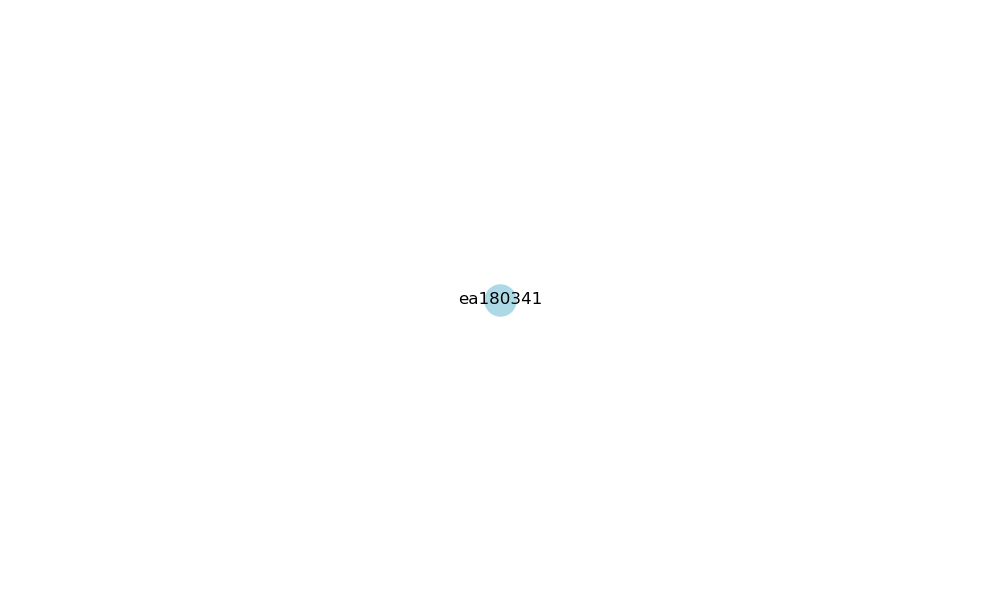

In [9]:
from PIL import Image

blueprint.visualize(filename="assembly_graph.png")
Image.open("assembly_graph.png")

In [11]:
from sklearn.metrics import classification_report

# Assuming output and target are tensors, move to cpu and convert to numpy
y_true = target.cpu().detach().numpy()
y_pred = output.cpu().detach().numpy()

# If this is a classification task, get predicted classes
if y_pred.ndim > 1 and y_pred.shape[1] > 1:
    y_pred_classes = y_pred.argmax(axis=1)
    y_true_classes = y_true.argmax(axis=1) if y_true.ndim > 1 and y_true.shape[1] > 1 else y_true
else:
    y_pred_classes = (y_pred > 0.5).astype(int)
    y_true_classes = y_true.astype(int)

print("Final Model Stats:")
print(model)
print(f"Total Parameters: {sum(p.numel() for p in model.parameters())}")
print(f"Final Average Loss: {avg_loss:.4f}")
print(classification_report(y_true_classes, y_pred_classes))


Final Model Stats:
MultimodalLearner(
  (fusion): CrossModalFusion(
    (attn): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
    )
    (proj): Linear(in_features=128, out_features=128, bias=True)
  )
  (core): ModularGeneralLearner(
    (layers): ModuleList(
      (0): TrackedLayer(
        (linear): Linear(in_features=128, out_features=64, bias=True)
      )
    )
  )
)
Total Parameters: 90816
Final Average Loss: 1.0006
              precision    recall  f1-score   support

           0       0.02      0.50      0.05         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8     

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklea

In [13]:
print("All components in the assembly:")
for component in blueprint.modules:
    print(component)

All components in the assembly:
TrackedLayer(
  (linear): Linear(in_features=128, out_features=64, bias=True)
)
